# 1-Importing Libraries and Load Data

 This notbook for exploring , cleaning the data and plot some graphs to represent data


In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

* connection to our SQLite database

In [2]:
# Creating a SQL connection to our SQLite database (bank_db)

database = 'bank_db.db'
conn = sql.connect(database)
print('Connection Successful...',conn)

Connection Successful... <sqlite3.Connection object at 0x0000021FB070A7B0>


In [3]:
# Loading the database into the dataframe
data = pd.read_sql_query("SELECT * FROM bank_full;", conn)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
# closing the connection, if not, we will run into errors in the future
conn.close()

# 2- EDA

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
data.shape

(45211, 17)

In [10]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
data.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
38536,45,unemployed,married,secondary,no,-407,yes,no,cellular,15,may,320,3,371,2,failure,no
31444,32,student,single,unknown,no,2321,no,no,cellular,30,mar,167,2,-1,0,unknown,no
20116,30,technician,married,secondary,no,274,yes,yes,cellular,11,aug,97,2,-1,0,unknown,no


In [13]:
data.tail(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [14]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [15]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [16]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [17]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [18]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [19]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

# 3- Data Cleaning

In [20]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [21]:
data.columns = [column.strip() for column in data.columns]

In [22]:
data.drop(columns='contact',inplace=True)

In [23]:
data.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [24]:
data.drop_duplicates(inplace=True)

In [25]:
data.shape

(45211, 16)

In [26]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

# 4-Data Visualization

C:\Users\nadaa\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


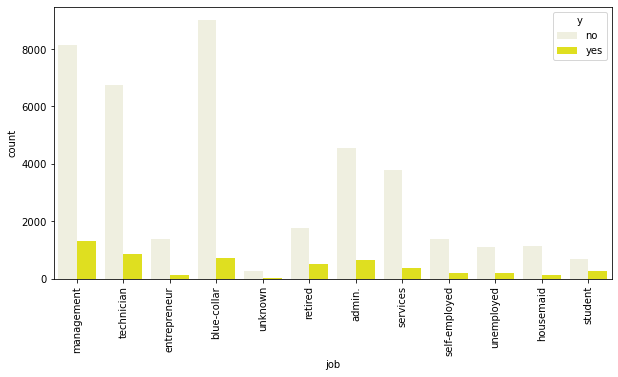

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data['job'],hue=data['y'],color='yellow')
plt.xticks(rotation=90);

/Users/rawan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


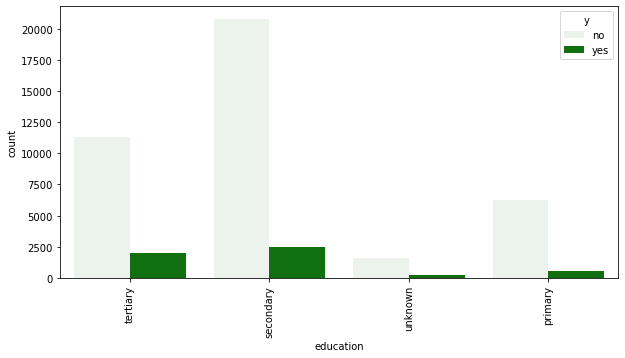

In [80]:
plt.figure(figsize=(10,5))
sns.countplot(data['education'],hue=data['y'],color='green')
plt.xticks(rotation=90);

In [29]:
Features=[feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['y']))]
Features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [30]:
for feature in Features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


* there are 9 categorical features
* feature job and month has highest number of categorical values

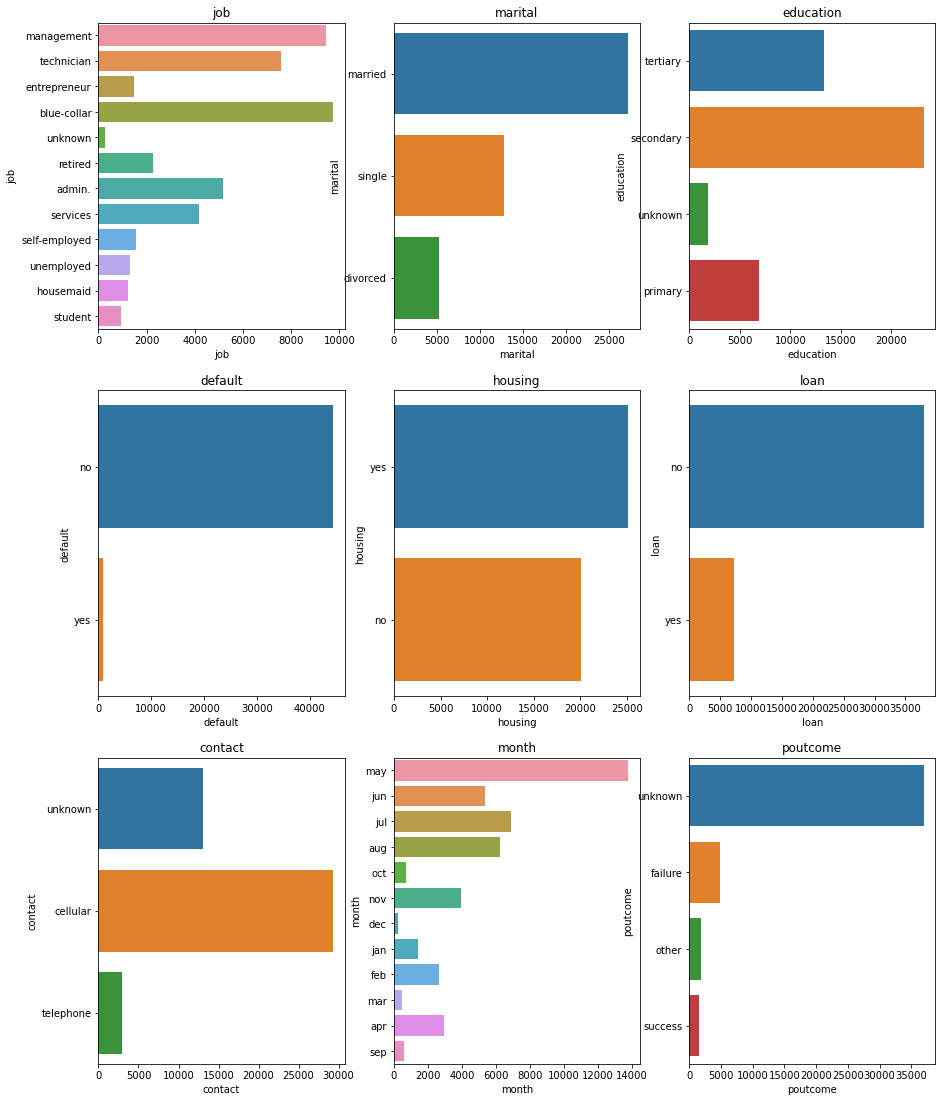

In [31]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in Features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

 Relationship between Categorical Features and Label

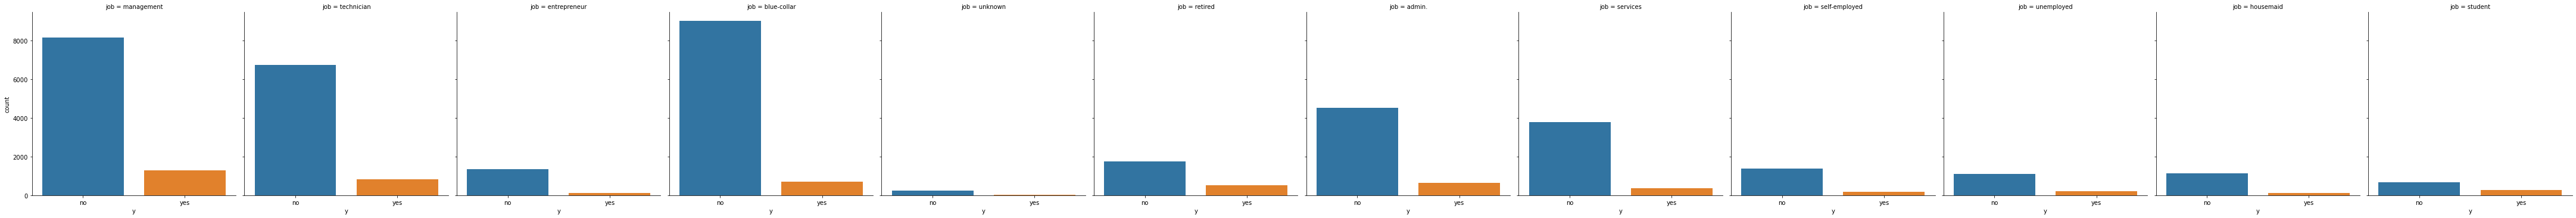

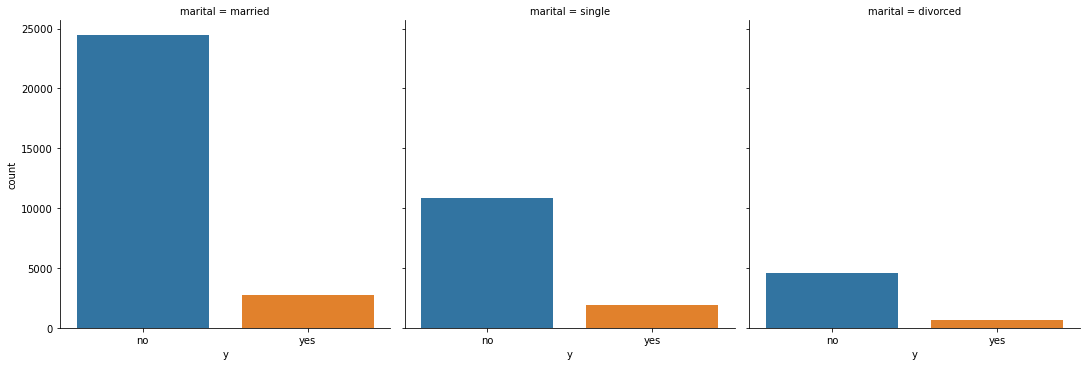

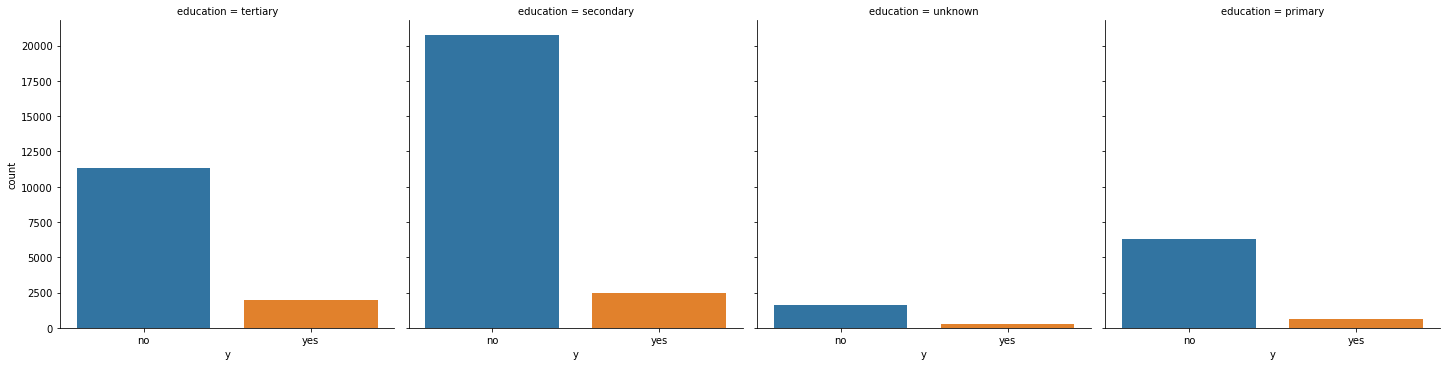

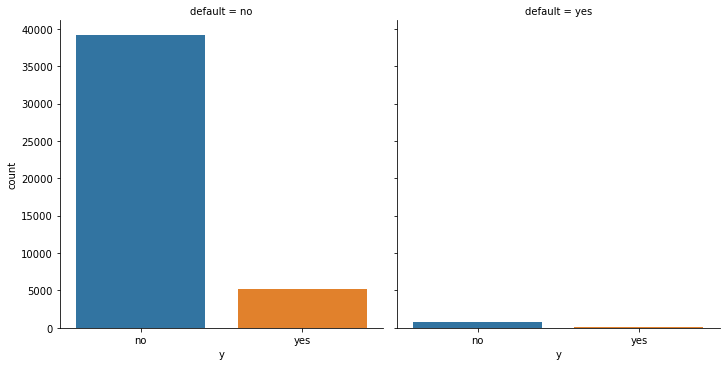

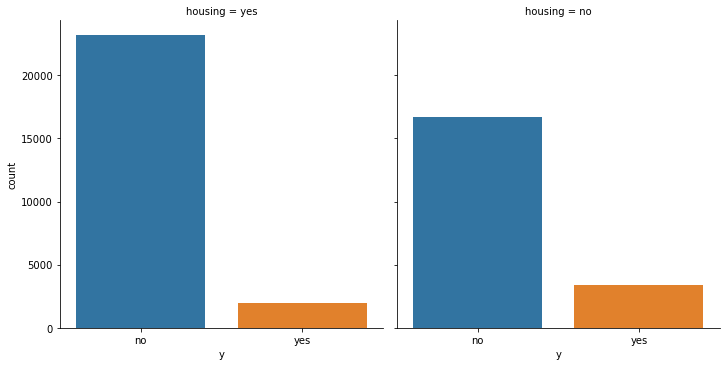

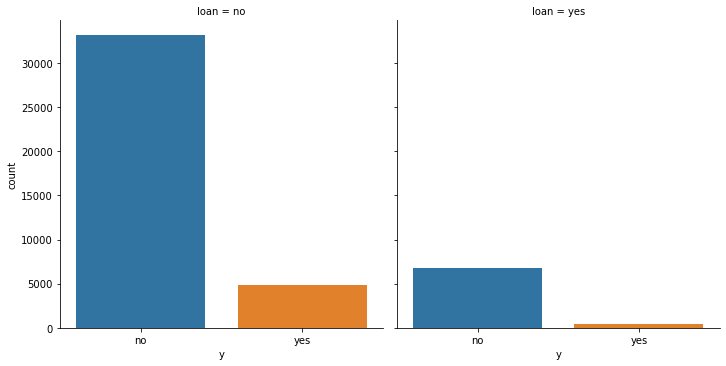

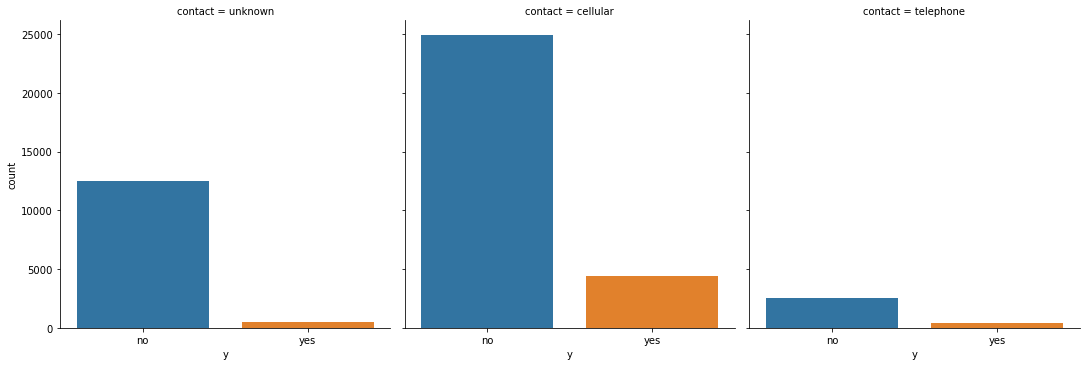

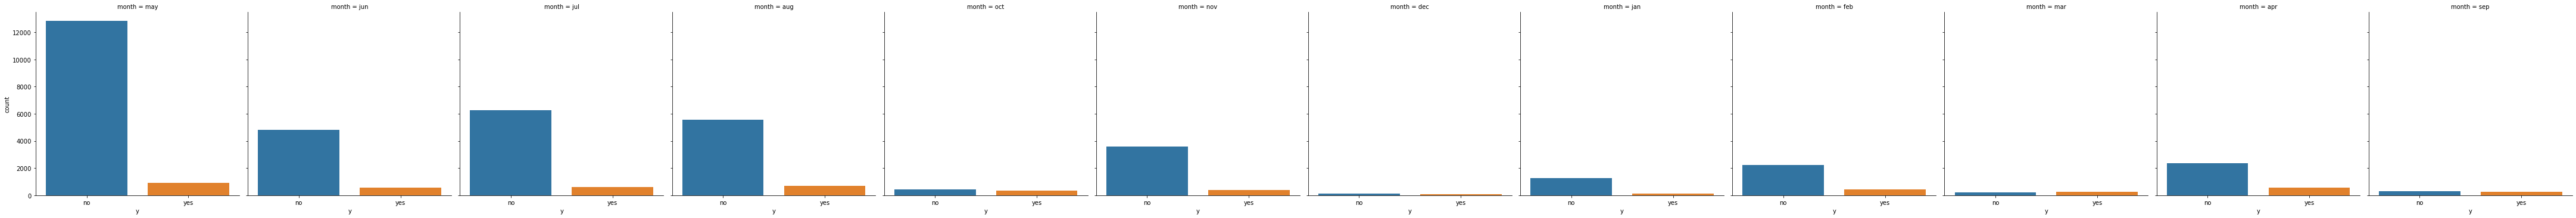

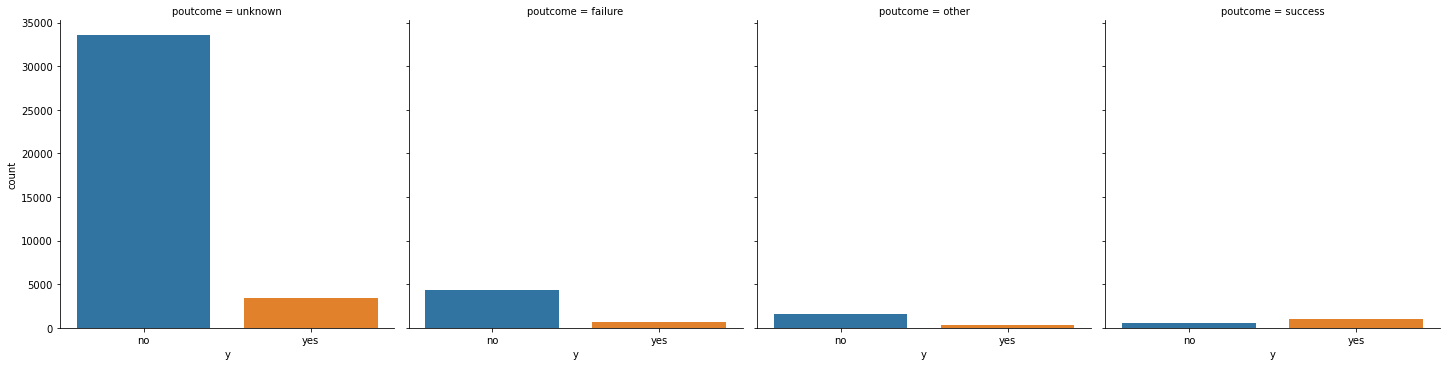

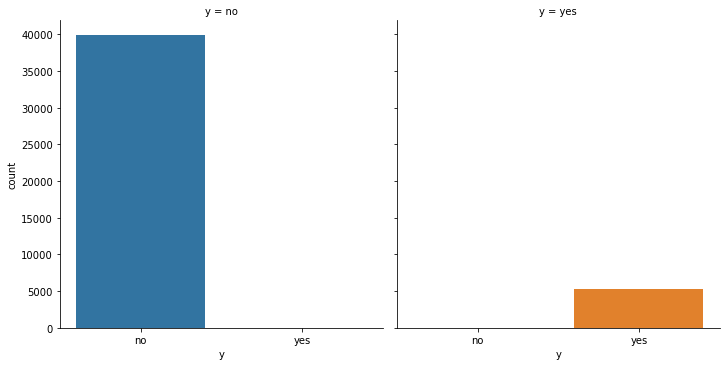

In [28]:
for categorical_feature in Features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= data)
plt.show()#check target label split over categorical features


# 5- Convert to Dummyies

In [32]:
# turning 'yes'&'no' to 1 and 0 for the y, housing, and default columns

data['loan']= data['loan'].apply(lambda x: '1' if x== 'yes' else '0')
data['y']= data['y'].apply(lambda x: '1' if x== 'yes' else '0')
data['housing']= data['housing'].apply(lambda x: '1' if x== 'yes' else '0')
data['default']= data['default'].apply(lambda x: '1' if x== 'yes' else '0')
data['pdays']= data['pdays'].apply(lambda x: '1' if x== '1' else '0')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0,0,unknown,0


In [25]:
data[['y','loan','default','pdays','housing']]= data[['y','loan','default','pdays','housing']].apply(pd.to_numeric)

In [26]:
data = pd.get_dummies(data, columns=['job','marital','month','education','poutcome'], prefix=['job','marital','month','education','poutcome'])
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_oct,month_sep,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,5,151,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,198,1,0,0,...,0,0,0,0,0,1,0,0,0,1


# Saving the dataframe back into the DataBase after the dummy values addition:

In [28]:
# Connecting to the database again and adding a new table that containes the dummies values

database = 'bank_db.db'
conn = sql.connect(database)
print('Connection Successful...',conn)

data = data.to_sql('bank_full_updated1', conn, if_exists='fail')

Connection Successful... <sqlite3.Connection object at 0x000001DBEE1455D0>


ValueError: Table 'bank_full_updated1' already exists.

In [30]:
# Checking to see if the new table where added to the DB

data = pd.read_sql_query("SELECT * FROM bank_full_updated1;", conn)
data

,index,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_oct,month_sep,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,0,2143,1,0,5,261,1,0,...,0,0,0,0,1,0,0,0,0,1
1,1,44,0,29,1,0,5,151,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2,33,0,2,1,1,5,76,1,0,...,0,0,0,1,0,0,0,0,0,1
3,3,47,0,1506,1,0,5,92,1,0,...,0,0,0,0,0,1,0,0,0,1
4,4,33,0,1,0,0,5,198,1,0,...,0,0,0,0,0,1,0,0,0,1
5,5,35,0,231,1,0,5,139,1,0,...,0,0,0,0,1,0,0,0,0,1
6,6,28,0,447,1,1,5,217,1,0,...,0,0,0,0,1,0,0,0,0,1
7,7,42,1,2,1,0,5,380,1,0,...,0,0,0,0,1,0,0,0,0,1
8,8,58,0,121,1,0,5,50,1,0,...,0,0,1,0,0,0,0,0,0,1
9,9,43,0,593,1,0,5,55,1,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
# closing the connection, if not, we will run into errors in the future
conn.close()

# 6-Correlation Matrix

In [32]:
data.corr()

,index,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_oct,month_sep,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
index,1.000000,0.014973,-0.053098,0.073639,-0.176143,-0.084240,-0.061465,0.013031,-0.102884,NaN,...,0.180418,0.179578,-0.068318,-0.046493,0.107891,-0.007199,0.333718,0.207178,0.263548,-0.497195
age,0.014973,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,NaN,...,0.060116,0.032418,0.196182,-0.093979,-0.081629,0.069665,-0.004927,-0.022967,0.035526,-0.000816
default,-0.053098,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,NaN,...,-0.017454,-0.013953,0.001623,0.013220,-0.015239,-0.001236,-0.026389,-0.014445,-0.023344,0.039490
balance,0.073639,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,NaN,...,0.040198,0.021922,-0.015451,-0.069937,0.084001,0.011181,0.011857,0.008466,0.035240,-0.030271
housing,-0.176143,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,NaN,...,-0.085439,-0.076343,0.010671,0.101659,-0.099175,-0.047595,0.106795,0.039710,-0.091360,-0.063755
loan,-0.084240,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,NaN,...,-0.030097,-0.033663,-0.012396,0.070625,-0.045940,-0.049992,-0.002186,-0.009099,-0.053713,0.031406
day,-0.061465,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,NaN,...,0.030514,-0.053890,-0.019551,-0.005831,0.021730,0.000114,-0.068700,-0.032952,-0.030321,0.086256
duration,0.013031,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,NaN,...,0.015076,0.015077,-0.003660,0.002084,0.000891,-0.000682,-0.018925,-0.001958,0.042389,-0.003491
campaign,-0.102884,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,NaN,...,-0.051031,-0.036718,0.009616,-0.020893,0.012866,0.005704,-0.088131,-0.020107,-0.057486,0.107965
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Pairplot

In [33]:
data.columns

Index(['index', 'age', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [35]:
X= data[['age','default','balance','housing','loan','day','duration','campaign']]
y= data[['y']]

NumExpr defaulting to 8 threads.


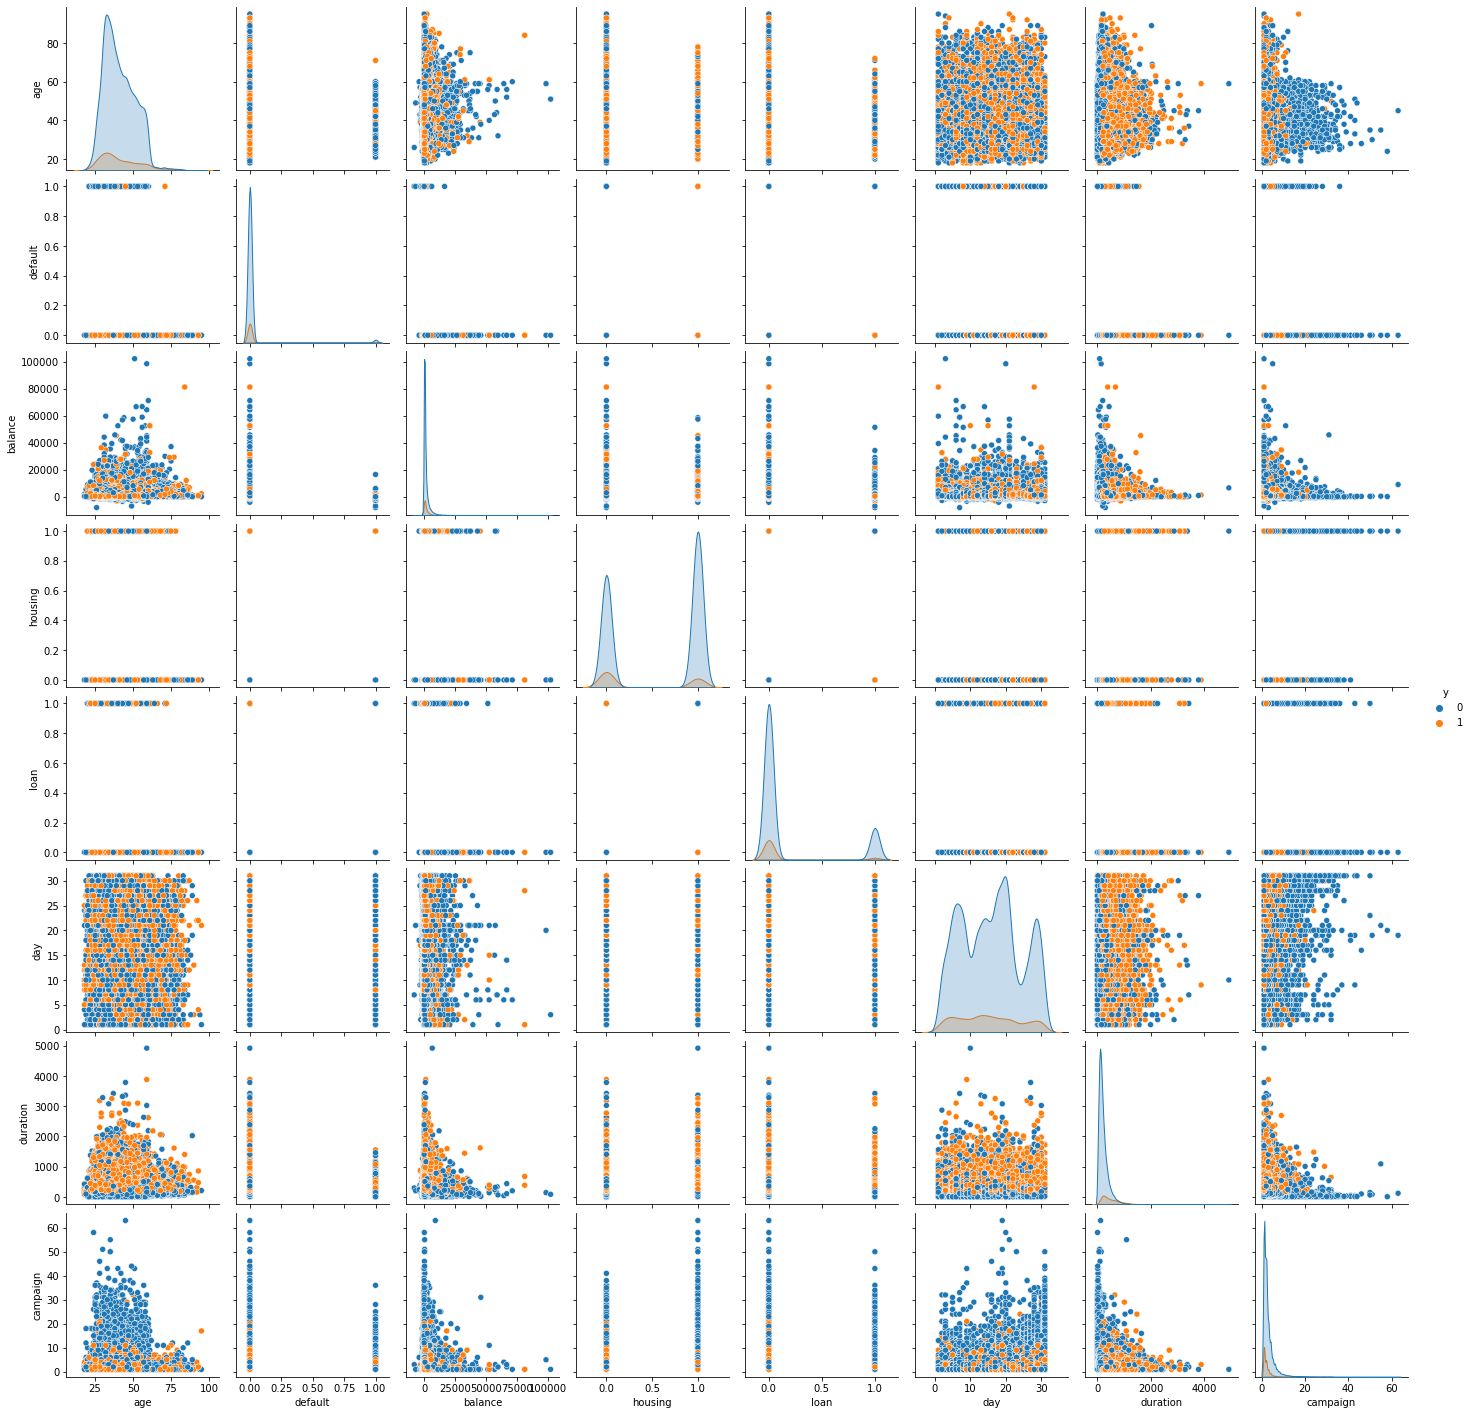

In [38]:

subset1 = data[['age','default','balance','housing','loan','day','duration','campaign','y']]
sns.pairplot(subset1, hue ='y')
plt.show()

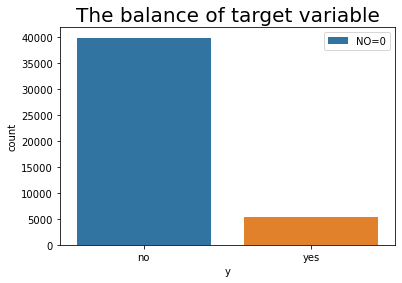

In [28]:
#plt.figure(figsize=(9,9))
sns.countplot(x=data['y'])
plt.title("The balance of target variable",fontsize=20)
plt.legend(['NO=0','YES=1'],loc = 0);

### word cloud

In [29]:
from wordcloud import WordCloud

In [32]:
text=" ".join(data['job'])

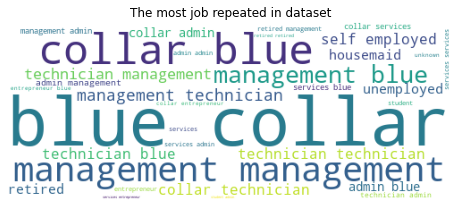

In [36]:
plt.rcParams['figure.figsize'] =8, 8
wordcloud = WordCloud(max_font_size=100, max_words=60, background_color="white",width=500, height=200).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.title("The most job repeated in dataset")
plt.show();